# DMHR_Visualisation

In [2]:
#preliminaries
import pandas as pd
import numpy as np

%matplotlib inline
import random
import matplotlib.pyplot as plt

### Read in the practice information data file to a pandas dataframe

In [3]:
#Identify the five most expensive drugs (costs per drug) for practice 'THE DENSHAM SURGERY' and plot them in a bar chart with pandas
cols2 = ['sha', 'pct', 'practice', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost', 'quantity', 'period']
jul2016 =  pd.read_csv('T201607PDPI+BNFT.CSV', header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())

In [4]:
practice_code= 'A81001' #"THE DENSHAM SURGERY"
selected_surgery = "THE DENSHAM SURGERY"
densham_data = jul2016[jul2016['practice'] == practice_code].copy(deep=True)
densham_data.head()

,sha,pct,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,period
118844,Q45,00K,A81001,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,1,4.39,4.08,15,201607
118845,Q45,00K,A81001,0101021B0BEAFAH,Gaviscon_Liq Relief Peppermint,1,7.11,6.60,600,201607
118846,Q45,00K,A81001,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),6,35.84,33.28,3500,201607
118847,Q45,00K,A81001,0101021B0BEANAH,Gaviscon Cool_Liq (Peppermint) S/F,1,4.46,4.15,300,201607
118848,Q45,00K,A81001,0101021B0BEARA0,Gaviscon Double Action_Tab Chble,1,9.66,9.06,84,201607


### Calculate costs per drug and store the five most expensive

In [6]:
densham_data['costs_per_drug'] =  densham_data['act_cost'] / densham_data['quantity']
densham_sorted=densham_data.sort_values('costs_per_drug', axis=0, ascending=False, kind='quicksort', na_position='last')
densham_top5 = densham_sorted.head(5)

### Bar Chart

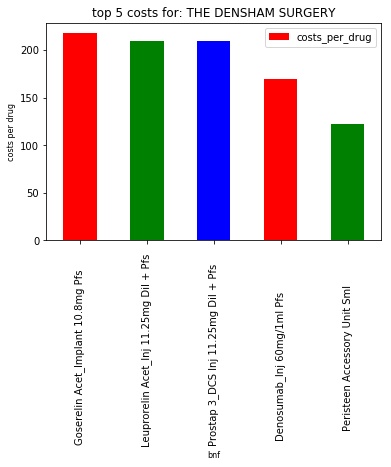

In [5]:
%matplotlib inline

ax=densham_top5[['bnf_name','costs_per_drug']].plot(kind='bar', x='bnf_name', y='costs_per_drug', color=['r', 'g', 'b', 'r', 'g', 'b', 'r'], title='top 5 costs for: '+ selected_surgery, figsize=(6,4),legend=True, fontsize=10)

ax.set_xlabel("bnf",fontsize=8)

ax.set_ylabel("costs per drug",fontsize=8)

# Task 1: Plot a bar chart with the ten most expensive drugs for the Densham Surgery, modify the colours of the bars, and update the labels

In [6]:
densham_top10 = densham_sorted.head(10)

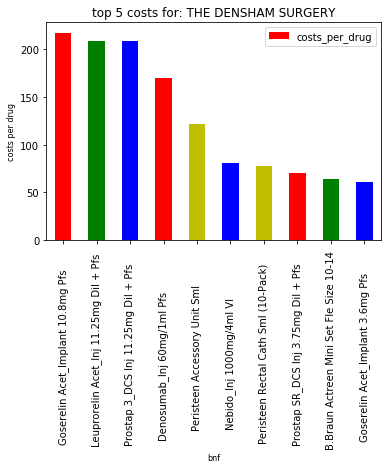

In [7]:
ax=densham_top10[['bnf_name','costs_per_drug']].plot(kind='bar', x='bnf_name', y='costs_per_drug', color=['r', 'g', 'b', 'r', 'y', 'b', 'y'], title='top 5 costs for: '+ selected_surgery, figsize=(6,4),legend=True, fontsize=10)

ax.set_xlabel("bnf",fontsize=8)

ax.set_ylabel("costs per drug",fontsize=8)

### Line Chart: Identify the time series of quantity) for ‘Ibuprofen-Tab 200 mg’ in the last three months for the Densham surgery and plot this data in a line chart

In [8]:
#helper function
def findQuantityDrug( drugName, currentdf, practice_code):
    tempdf= currentdf[(currentdf['practice'] == practice_code) &(currentdf['bnf_name'].str.contains(drugName))]
    quantityDrug = tempdf.iloc[0]['quantity']
    return int(quantityDrug);

In [9]:
num_months = input("\nPlease enter the number of months you would like to show: ")
print ('you entered', num_months)


Please enter the number of months you would like to show: 12
('you entered', 12)


In [11]:
#generate filenames for pre-selected months
files=[]
months=[]

import calendar
for year in range(2016,2017):
    for i in range(1,num_months+1):
        files.append('T' + str(year) +str(i).zfill(2) + 'PDPI+BNFT.CSV')
        months.append(calendar.month_name[i])

In [12]:
#read all dfs

monthly_dfs = []

for i in range(0,num_months):
    tmpDF = pd.read_csv(files[i], header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
    print (files[i])
    monthly_dfs.append(tmpDF)

T201601PDPI+BNFT.CSV
T201602PDPI+BNFT.CSV
T201603PDPI+BNFT.CSV
T201604PDPI+BNFT.CSV
T201605PDPI+BNFT.CSV
T201606PDPI+BNFT.CSV
T201607PDPI+BNFT.CSV
T201608PDPI+BNFT.CSV
T201609PDPI+BNFT.CSV
T201610PDPI+BNFT.CSV
T201611PDPI+BNFT.CSV
T201612PDPI+BNFT.CSV


In [13]:
def getMonthlyDrugPrescriptions(drugName):
    
    monthly_drug=[]
    
    for i in range(0,num_months):
        quantity = findQuantityDrug(drugName, currentdf=monthly_dfs[i], practice_code='A81001')
        monthly_drug.append(quantity)
        
    return monthly_drug

In [14]:
drugName = "Ibuprofen_Tab 200mg"
monthly_IBUprofen = getMonthlyDrugPrescriptions(drugName)

# Line Chart

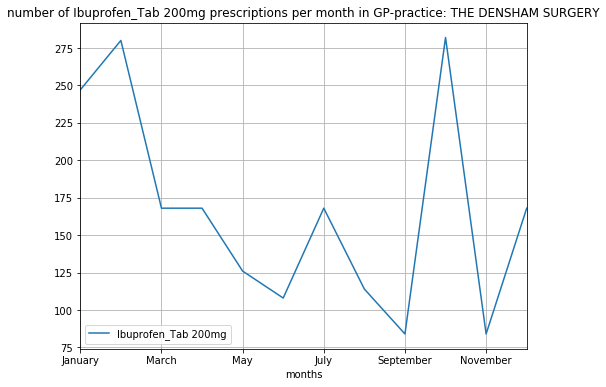

In [15]:
#let's look at annual line chart of prescriptions per month in GP-practice
df2 = pd.DataFrame({'months' : pd.Categorical(months),
   'prescriptions per month' : pd.Series(monthly_IBUprofen, dtype='int32')})

titles="number of " + drugName + " prescriptions per month in GP-practice: " + selected_surgery         
ax0=df2.plot(kind='line', x='months', y='prescriptions per month', figsize=(8,6), title=titles, stacked=False)
ax0.grid() #adding a grid
ax0.legend([drugName])

# Task 2: Visualize "Cetirizine HCl_Tab 10mg"

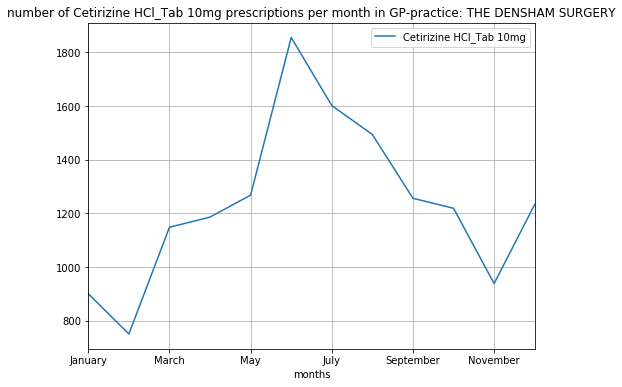

In [16]:
#solution
drugName = "Cetirizine HCl_Tab 10mg"

monthly_Ceterizine = getMonthlyDrugPrescriptions(drugName)

df2 = pd.DataFrame({'months' : pd.Categorical(months),
   'prescriptions per month' : pd.Series(monthly_Ceterizine, dtype='int32')})

titles="number of " + drugName + " prescriptions per month in GP-practice: " + selected_surgery         
ax0=df2.plot(kind='line', x='months', y='prescriptions per month', 
             figsize=(8,6), title=titles, stacked=False)
ax0.grid() #adding a grid
ax0.legend([drugName])

# Task 3: Visualize any medication of your interest

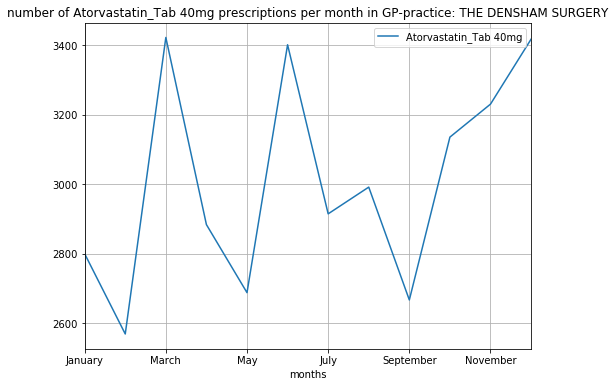

In [17]:
#solution
drugName = "Atorvastatin_Tab 40mg"

monthly_Atorvastatin = getMonthlyDrugPrescriptions(drugName)

df2 = pd.DataFrame({'months' : pd.Categorical(months),
   'prescriptions per month' : pd.Series(monthly_Atorvastatin, dtype='int32')})

titles="number of " + drugName + " prescriptions per month in GP-practice: " + selected_surgery         
ax0=df2.plot(kind='line', x='months', y='prescriptions per month', 
             figsize=(8,6), title=titles, stacked=False)
ax0.grid() #adding a grid
ax0.legend([drugName])

# Identify how often (Atorvastatin_Tab 40mg, Simvastatin_Tab 40mg, Rosuvastatin Calc_Tab 40mg) were prescribed from Feb - August 2016 in England and plot this data in a stacked bar chart

In [18]:
def findTotalCostsDrugUK( drugName, currentdf):
    return currentdf[currentdf['bnf_name'].str.contains(drugName)].act_cost.sum()

drugs = ["Atorvastatin_Tab 40mg", "Simvastatin_Tab 40mg"]

In [19]:
def monthly_statins(drug, start_month, end_month):
    
    statin_monthly=[]
    for i in range(start_month, end_month+1):
        statin_monthly.append(findTotalCostsDrugUK(drug, monthly_dfs[i]))
    
    return statin_monthly

In [20]:
atorvastatin=monthly_statins(drugs[0], 1, 7) #from January to August
simvastatin=monthly_statins(drugs[1], 1, 7)

In [21]:
df3 = pd.DataFrame({'months' : pd.Categorical(months[1:8]), #Feb to August
                    'Atorvastatin' : pd.Series(atorvastatin,dtype='int64'),
                    'Simvastatin' : pd.Series(simvastatin,dtype='int64')})

In [22]:
df3

,Atorvastatin,Simvastatin,months
0,72286,100213,February
1,78812,104412,March
2,81410,104064,April
3,77905,97828,May
4,74832,91058,June
5,72494,85644,July
6,74923,86353,August


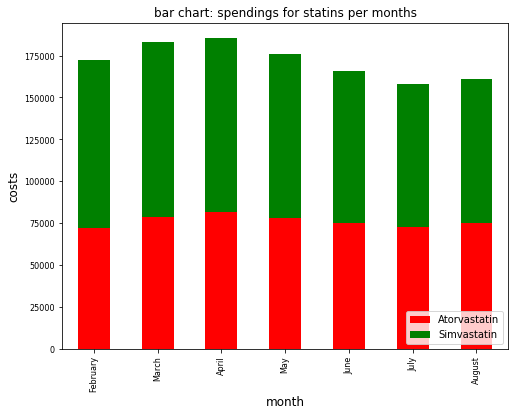

In [23]:
ax1 = df3.plot(kind='bar', x='months', title="bar chart: spendings for statins per months",stacked=True, color=['r', 'g', 'b'], figsize=(8,6), legend=True, fontsize=8)
ax1.set_xlabel("month",fontsize=12)
ax1.set_ylabel("costs",fontsize=12)
ax1.legend(loc='lower right')

# Task 5: Create a stacked bar chart from Jul - December 2016 and include "Rosuvastatin Calc_Tab 40mg"

In [24]:
#solution
drugs = ["Atorvastatin_Tab 40mg", "Simvastatin_Tab 40mg", "Rosuvastatin Calc_Tab 40mg"]

atorvastatin=monthly_statins(drugs[0], 6, 11) #from January to December
simvastatin=monthly_statins(drugs[1], 6, 11)
Rosuvastatin=monthly_statins(drugs[2], 6, 11)

df3 = pd.DataFrame({'months' : pd.Categorical(months[6:12]), #Jul to Dec 2016
                    'Atorvastatin' : pd.Series(atorvastatin,dtype='int64'),
                    'Simvastatin' : pd.Series(simvastatin,dtype='int64'),
                    'Rosuvastatin' : pd.Series(Rosuvastatin,dtype='int64')})

In [25]:
df3

,Atorvastatin,Rosuvastatin,Simvastatin,months
0,72494,12995,85644,July
1,74923,13272,86353,August
2,76716,13642,85484,September
3,72833,12770,80804,October
4,75282,12104,82114,November
5,80049,14072,84544,December


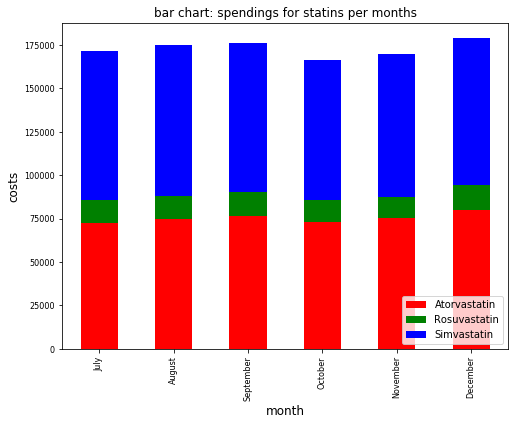

In [26]:
ax1 = df3.plot(kind='bar', x='months', title="bar chart: spendings for statins per months",stacked=True, color=['r', 'g', 'b'], figsize=(8,6), legend=True, fontsize=8)
ax1.set_xlabel("month",fontsize=12)
ax1.set_ylabel("costs",fontsize=12)
ax1.legend(loc='lower right')

# Scatterplot

In [27]:
#Numbers of Patients Registered at a GP Practice
#http://digital.nhs.uk/media/29065/Numbers-of-Patients-Registered-at-a-GP-Practice-July-2016-GP/Any/gp-reg-patients-prac-quin-age.csv'

gp_counts = pd.read_csv('gp-reg-patients-prac-quin-age.csv').rename(columns=lambda x: x.strip())

In [28]:
total_costs_practices =pd.DataFrame(jul2016.groupby(jul2016.practice).apply(lambda subf: subf['act_cost'].sum()))
total_costs_practices.columns = ['total_costs_per_practice']
# Reseting the index
total_costs_practices.reset_index(inplace=True)
total_costs_practices.head()

,practice,total_costs_per_practice
0,A81001,63063.24
1,A81002,303484.11
2,A81003,38330.54
3,A81004,129573.54
4,A81005,103921.91


(0, 40000)

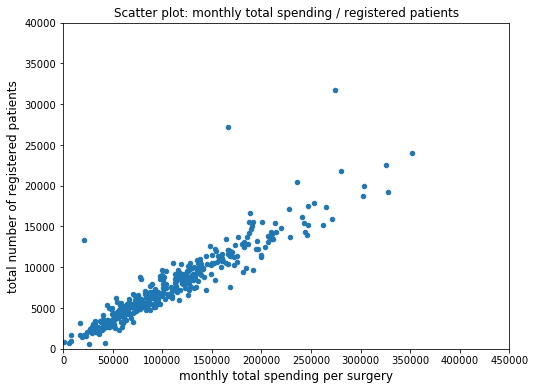

In [29]:
merged = pd.merge(total_costs_practices, gp_counts[['GP_PRACTICE_CODE', 'Total_All']], left_on='practice' , right_on='GP_PRACTICE_CODE')
ax3=merged.plot(kind='scatter', x='total_costs_per_practice', y='Total_All', title='Scatter plot: monthly total spending / registered patients', figsize=(8,6))
ax3.set_xlabel("monthly total spending per surgery",fontsize=12)
ax3.set_ylabel("total number of registered patients",fontsize=12)
ax3.set_xlim(0, 450000)
ax3.set_ylim(0, 40000)

# Task 6: Redraw the previous scatterplot and modify the max-value of x and y-axis 

(0, 31770.0)

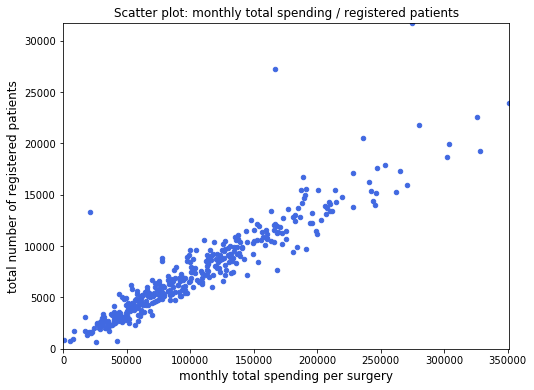

In [30]:
#solution

from math import floor
max_x = floor(merged.total_costs_per_practice.max())
max_y = floor(merged.Total_All.max())

ax4=merged.plot(kind='scatter', x='total_costs_per_practice', y='Total_All', title='Scatter plot: monthly total spending / registered patients', 
                color='royalblue', figsize=(8,6))
ax4.set_xlabel("monthly total spending per surgery",fontsize=12)
ax4.set_ylabel("total number of registered patients",fontsize=12)
ax4.set_xlim(0, max_x)
ax4.set_ylim(0, max_y)

# Scatterplot with correlation

(0, 31770.0)

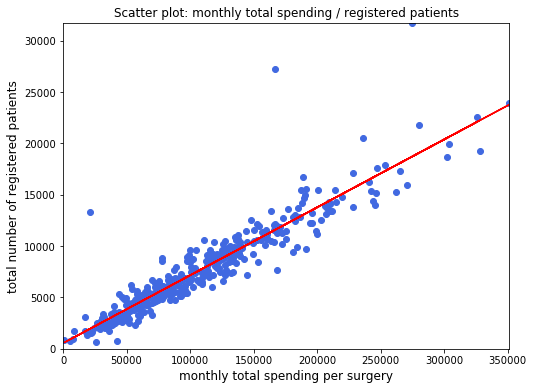

In [31]:
# plot those data points
#fig, ax = plt.subplots()
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= merged['total_costs_per_practice']
y = merged['Total_All']
ax.scatter(x, y, color='royalblue')
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_title('Scatter plot: monthly total spending / registered patients')
ax.set_xlabel("monthly total spending per surgery",fontsize=12)
ax.set_ylabel("total number of registered patients",fontsize=12)
max_x = floor(merged.total_costs_per_practice.max())
max_y = floor(merged.Total_All.max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

# Histogram

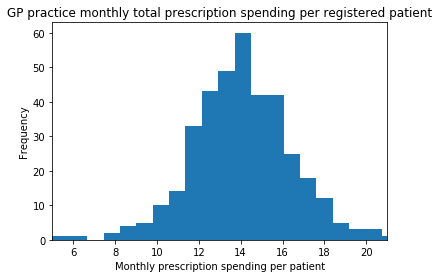

In [32]:
cost_patient_plot = merged
cost_patient_plot['cost_per_patient'] = cost_patient_plot['total_costs_per_practice'] / cost_patient_plot['Total_All'] 

x = cost_patient_plot.cost_per_patient.values

plt.hist(x, bins=75)
plt.xlabel("Monthly prescription spending per patient")
plt.ylabel("Frequency")

min_x = floor(cost_patient_plot['cost_per_patient'].quantile(.01))
max_x = floor(cost_patient_plot['cost_per_patient'].quantile(.99))
plt.xlim(min_x, max_x) #do not show outliers
plt.title("GP practice monthly total prescription spending per registered patient")
plt.show()

# More about Line Charts

In [33]:
import pandas as pd
#url_au = 'https://www.google.org/flutrends/about/data/flu/au/data.txt'
url_au = 'data_au.txt'

#set header=8 to properly extract the data
australiaFluTrends = pd.read_csv(url_au, sep=',', header = 8)
australiaFluTrends['Date'] = pd.to_datetime(australiaFluTrends['Date'])

australiaFluTrends.head(5)

,Date,Australia,Australian Capital Territory,New South Wales,Queensland,South Australia,Victoria,Western Australia
0,2006-01-01,163,NaN,151,190,183,202,121
1,2006-01-08,174,104.0,170,189,162,169,214
2,2006-01-15,136,96.0,139,186,165,109,135
3,2006-01-22,121,143.0,119,142,107,129,99
4,2006-01-29,127,149.0,121,156,118,119,77


In [34]:
australiaFluTrends.head()

,Date,Australia,Australian Capital Territory,New South Wales,Queensland,South Australia,Victoria,Western Australia
0,2006-01-01,163,NaN,151,190,183,202,121
1,2006-01-08,174,104.0,170,189,162,169,214
2,2006-01-15,136,96.0,139,186,165,109,135
3,2006-01-22,121,143.0,119,142,107,129,99
4,2006-01-29,127,149.0,121,156,118,119,77


In [35]:
#Store the url of the database in a variable
#url_ca = 'https://www.google.org/flutrends/about/data/flu/ca/data.txt'
url_ca = 'data_ca.txt'

#set header=8 to properly extract the data
canadaFluTrends = pd.read_csv(url_ca, sep=',', header=8)
canadaFluTrends['Date'] = pd.to_datetime(canadaFluTrends['Date'])

canadaFluTrends.head(5)

,Date,Canada,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Saskatchewan,Quebec
0,2003-09-28,1280,NaN,1353,NaN,NaN,NaN,NaN,1349,NaN,960
1,2003-10-05,1339,2309.0,1161,1977.0,NaN,NaN,NaN,1323,NaN,1278
2,2003-10-12,1451,2615.0,1546,2313.0,NaN,NaN,NaN,1119,NaN,1344
3,2003-10-19,1593,2910.0,1813,1958.0,NaN,NaN,1805.0,1213,NaN,1377
4,2003-10-26,1895,4793.0,1883,1560.0,1600.0,NaN,1955.0,1492,3076.0,1138


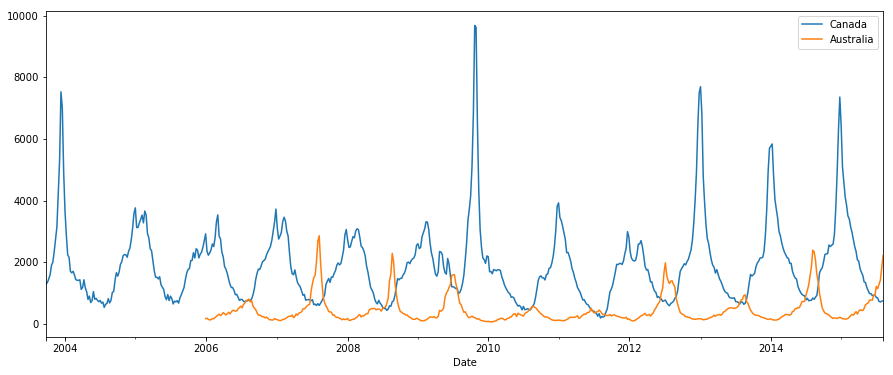

In [36]:
%matplotlib inline
#Plot and store the flu trens for Canada

ax = canadaFluTrends.plot(legend ='left', x='Date', y = 'Canada', figsize=(15, 6), grid=True)
#Plot the flu trend for Australia; ax=ax plots the chart into the previous

australiaFluTrends.plot(x='Date', y = 'Australia' , ax=ax)

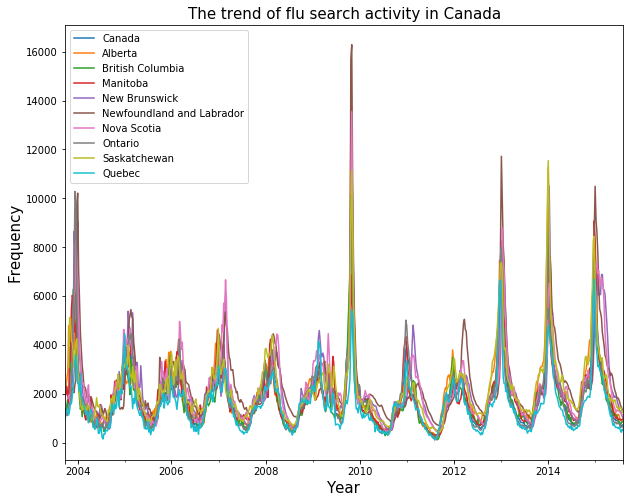

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
fig_ca = canadaFluTrends.plot(x='Date', figsize=(10,8))
fig_ca.set_title('The trend of flu search activity in Canada',fontsize=15)
fig_ca.set_ylabel('Frequency',fontsize=15)
fig_ca.set_xlabel('Year',fontsize=15)

# Task 7: Plot the chart for Australia

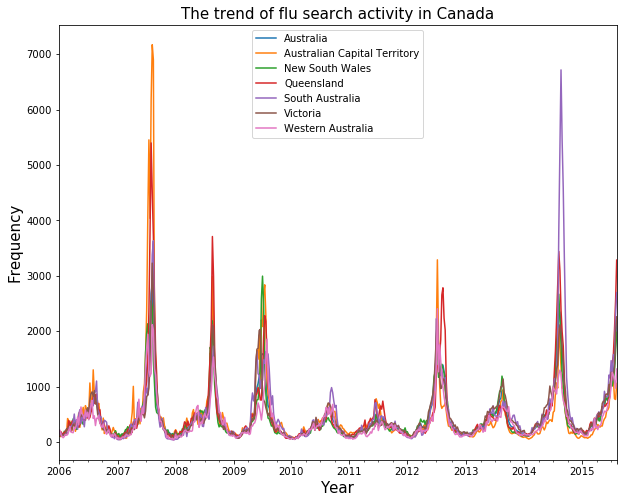

In [38]:
#solution
import matplotlib.pyplot as plt
%matplotlib inline
fig_au = australiaFluTrends.plot(x='Date', figsize=(10,8))
fig_au.set_title('The trend of flu search activity in Canada',fontsize=15)
fig_au.set_ylabel('Frequency',fontsize=15)
fig_au.set_xlabel('Year',fontsize=15)